In [1]:
! pip install datasets[audio]

                                              0.0/486.2 kB ? eta -:--:--
     --------------------                   256.0/486.2 kB 7.7 MB/s eta 0:00:01
     -------------------------------------- 486.2/486.2 kB 7.6 MB/s eta 0:00:00
                                              0.0/21.5 MB ? eta -:--:--
                                              0.5/21.5 MB 15.5 MB/s eta 0:00:02
     -                                        1.0/21.5 MB 13.1 MB/s eta 0:00:02
     --                                       1.6/21.5 MB 12.4 MB/s eta 0:00:02
     ---                                      2.1/21.5 MB 12.3 MB/s eta 0:00:02
     ----                                     2.7/21.5 MB 12.2 MB/s eta 0:00:02
     -----                                    3.2/21.5 MB 12.0 MB/s eta 0:00:02
     -------                                  3.8/21.5 MB 12.0 MB/s eta 0:00:02
     --------                                 4.3/21.5 MB 12.0 MB/s eta 0:00:02
     ---------                                4.9/21.5 

In [2]:
# load and prepare MINDS-14 dataset with Australian training subset
from datasets import load_dataset
minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")
minds

c:\Users\Raj\repos\HF-Audio\1-working-with-audio-data\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset minds14 downloaded and prepared to C:/Users/Raj/.cache/huggingface/datasets/PolyAI___minds14/en-AU/1.0.0/65c7e0f3be79e18a6ffaf879a083daf706312d421ac90d25718459cbf3c42696. Subsequent calls will reuse this data.


Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 654
})

In [3]:
example = minds[0]
example

{'path': 'C:\\Users\\Raj\\.cache\\huggingface\\datasets\\downloads\\extracted\\33db068c0127d574c944aa45170ab78a7d5079b92508e6a86d39e012cc006d49\\en-AU~PAY_BILL\\response_4.wav',
 'audio': {'path': 'C:\\Users\\Raj\\.cache\\huggingface\\datasets\\downloads\\extracted\\33db068c0127d574c944aa45170ab78a7d5079b92508e6a86d39e012cc006d49\\en-AU~PAY_BILL\\response_4.wav',
  'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
          0.00024414,  0.0012207 ]),
  'sampling_rate': 8000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'english_transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13,
 'lang_id': 2}

In [4]:
# intent class is a classification category of the audio recording
id2label = minds.features["intent_class"].int2str
id2label(example["intent_class"])

'pay_bill'

In [5]:
id2label

<bound method ClassLabel.int2str of ClassLabel(names=['abroad', 'address', 'app_error', 'atm_limit', 'balance', 'business_loan', 'card_issues', 'cash_deposit', 'direct_debit', 'freeze', 'high_value_payment', 'joint_account', 'latest_transactions', 'pay_bill'], id=None)>

In [6]:
# easily remove columns from dataset with remove_columns()
columns_to_remove = ["lang_id", "english_transcription"]
minds = minds.remove_columns(columns_to_remove)
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 654
})

In [8]:
! pip install gradio

  Using cached gradio-3.36.1-py3-none-any.whl (19.8 MB)
  Using cached aiofiles-23.1.0-py3-none-any.whl (14 kB)
  Using cached altair-5.0.1-py3-none-any.whl (471 kB)
  Using cached fastapi-0.100.0-py3-none-any.whl (65 kB)
  Using cached ffmpy-0.3.0-py3-none-any.whl
  Using cached gradio_client-0.2.7-py3-none-any.whl (288 kB)
  Using cached httpx-0.24.1-py3-none-any.whl (75 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
  Using cached MarkupSafe-2.1.3-cp311-cp311-win_amd64.whl (17 kB)
  Using cached mdit_py_plugins-0.3.3-py3-none-any.whl (50 kB)
  Using cached orjson-3.9.2-cp311-none-win_amd64.whl (195 kB)
  Using cached pydantic-2.0.2-py3-none-any.whl (359 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)
  Using cached python_multipart-0.0.6-py3-none-any.whl (45 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl (15 kB)
  Using cached uvicorn-0.22.0-py3-none-any.whl (58 kB)
  Using cached w

In [9]:
# use the Blocks and Audio features from Gradio to decode a few random samples from the dataset
import gradio as gr

def generate_audio():
    example = minds.shuffle()[0]
    audio = example["audio"]
    return (
        audio["sampling_rate"],
        audio["array"],
    ), id2label(example["intent_class"])

with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)

demo.launch(debug=True)

c:\Users\Raj\repos\HF-Audio\1-working-with-audio-data\.venv\Lib\site-packages\gradio\processing_utils.py:183: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.


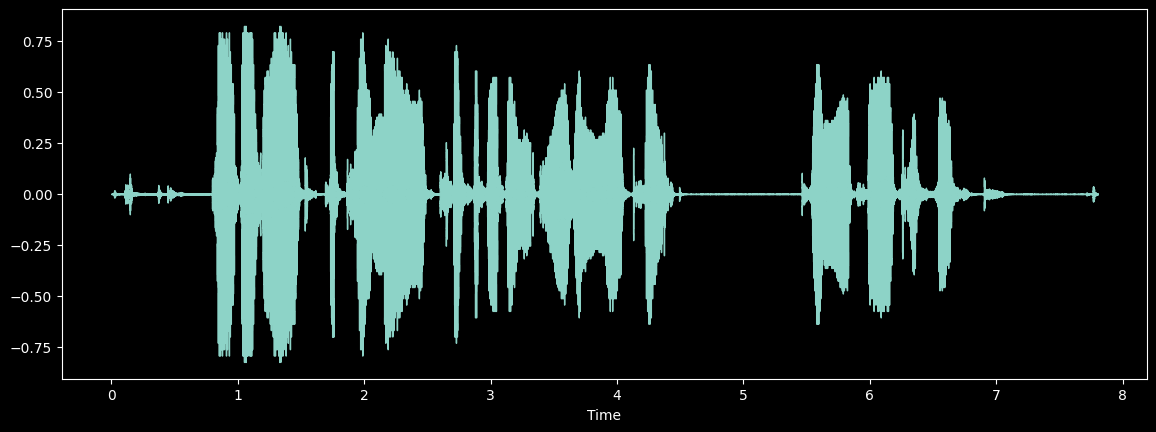

In [11]:
# let's plot the wavefrom of one of the audio examples
import librosa
import librosa.display
import matplotlib.pyplot as plt

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(14)
librosa.display.waveshow(array, sr=sampling_rate)

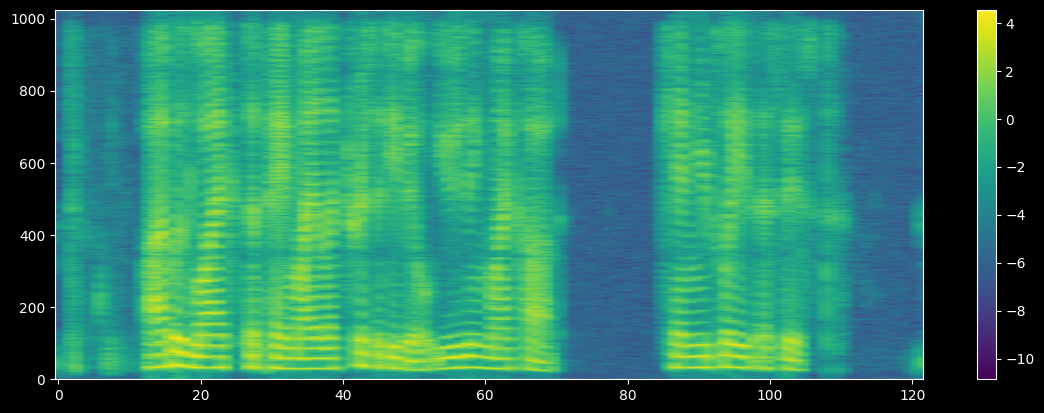

In [12]:
# let's plot the spectrogram of one of the audio examples
import numpy as np

def plot_spectrogram(array, sampling_rate):
    plt.figure().set_figwidth(14)
    plt.imshow(
        np.log(np.abs(librosa.stft(array))),
        origin="lower",
        aspect="auto",
        cmap="viridis",
    )
    plt.colorbar()

plot_spectrogram(array, sampling_rate)